# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: viernes 8 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import random
import statistics as stats
import scipy
import math
import time
from IPython.display import display, Math

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [3]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [4]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        #dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [13]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 100, 69.07044451459723, 130.92955548540277]
[117.9089660324627, 100, 69.07044451459723, 113.02058945294007]
[138.28598563897512, 100, 48.69342490808481, 113.02058945294007]
[214.15950118909694, 24.126484449878177, 48.69342490808481, 113.02058945294007]
[196.71754845779648, 24.126484449878177, 48.69342490808481, 130.46254218424056]
[324.1121402520857, 24.126484449878177, 48.69342490808481, 3.0679503899513634]
[324.1121402520857, 7.406414001022508, 48.69342490808481, 19.788020838807032]
[100.44752138131392, 7.406414001022508, 48.69342490808481, 243.4526397095788]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [16]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.9   54   74  100  125  146
 20,000 0.49  95.3    1   11   72  226  445
 40,000 0.50 101.3    1   10   68  230  479
 60,000 0.50 101.5    1   10   70  227  473
 80,000 0.51 102.7    1   10   68  234  466
100,000 0.51 102.9    1   10   68  233  480
120,000 0.50  99.4    1   11   70  231  451
140,000 0.51 103.8    1   10   68  235  464
160,000 0.50  99.9    1   10   69  234  458
180,000 0.50 101.2    1   11   69  233  472
200,000 0.50  99.7    1   10   71  231  440


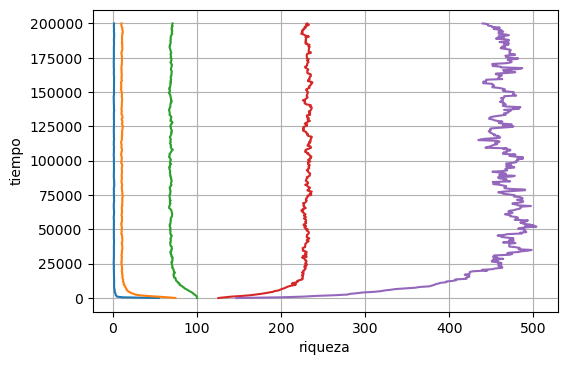

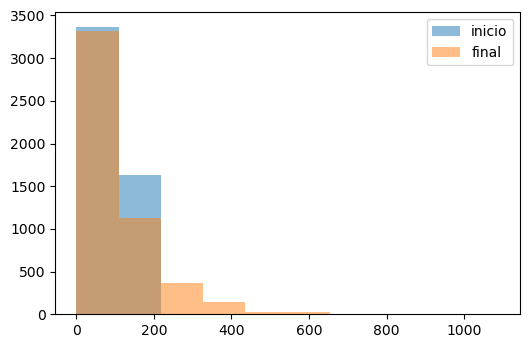

In [17]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

### Respuesta Parte I

### 1. a)

In [18]:
# Funciones utilizadas para normalizar la distribución 
# extraidas de https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb
def samples(distribution, *args, n=N, mu=MU):
    "Sample from the distribution n times, then normalize results to have mean mu."
    numbers = [distribution(*args) for _ in range(N)]
    return normalize(numbers, mu)

def normalize(numbers, mu):
    "Make the numbers non-negative, and scale them so they have mean mu."
    numbers = [max(0, n) for n in numbers]
    factor = len(numbers) * mu / sum(numbers)
    return [x * factor for x in numbers]

Como nueva distribución inicial del dinero se propone una distribución gamma con parámetros alpha = 0.5 y beta = 0.2.

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.64 140.9    0    2   47  271  660
 20,000 0.51 103.6    1   11   68  231  477
 40,000 0.50  99.5    1   11   69  231  463
 60,000 0.50 100.9    1   10   68  234  459
 80,000 0.50  98.4    1   10   72  226  432
100,000 0.50  99.3    1   10   68  234  445
120,000 0.50 100.0    1   11   69  231  465
140,000 0.50  98.7    1   11   70  230  443
160,000 0.50  98.1    1   11   71  229  449
180,000 0.50 100.6    1   11   70  231  479
200,000 0.50 100.2    1   11   68  230  465


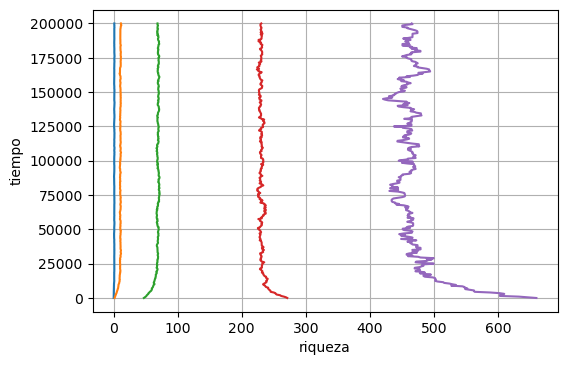

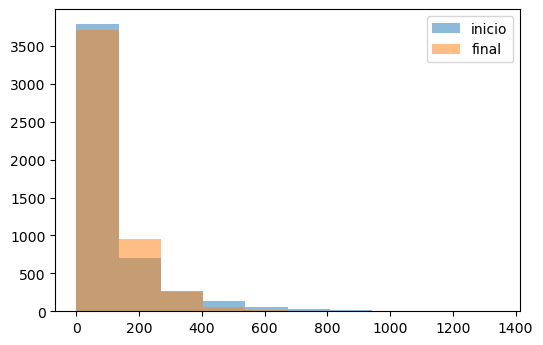

In [19]:
def gamma(): return random.gammavariate(0.5,0.2)
show(samples(gamma))

### 1. b)

La función de transacción propuesta consiste en dividir el pozo en tres partes iguales, donde una persona elegida de manera aleatoria se queda con 1/3 del total y la otra con 2/3 del total buscando que la transacción sea un poco más equitativa.

In [9]:
def transaccion_modif(A, B):
    pozo = A + B
    C = [pozo/3, 2*pozo/3]
    random.shuffle(C)
    return C

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.63 135.6    0    2   47  271  607
 20,000 0.30  56.1   26   43   86  175  275
 40,000 0.28  50.7   30   46   88  174  251
 60,000 0.28  50.3   29   45   89  174  244
 80,000 0.27  49.8   29   45   89  171  241
100,000 0.28  50.3   29   45   89  173  249
120,000 0.28  50.4   30   45   89  171  249
140,000 0.28  50.4   30   46   88  172  248
160,000 0.27  49.9   30   46   89  170  245
180,000 0.27  49.6   31   46   89  173  246
200,000 0.27  49.7   30   46   88  171  249


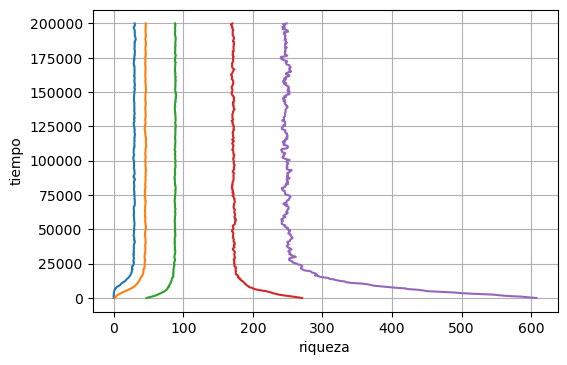

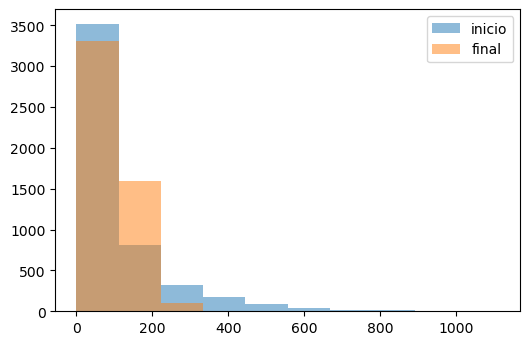

In [50]:
res = show(samples(gamma))

En principio se observa que al utilizar la función de transacción modificada hay una baja notoria en el coeficiente de Gini alcanzando un valor de 0.27, lo que indica que la distribución de riquezas es mucho más equitativa que en la simulación con la función de transacción original, además la desviación estándar también disminuye, lo que significa una menor variabilidad en las riquezas y por ende una distribución menos desigual.

Otro factor que podría afectar el resultado de la simulación es la función de interacción que define cómo son seleccionadas las personas para realizar una transacción. Si hubiera un sesgo en la selección y no fuera aleatorio es probable que la distribución de riquezas se vuelva desigual. 

### 2

A: el coef de gini de la población se encuentra entre 0.2 y 0.5
B: la desviación estándar de la población es mayor 70
C: la mediana de la población es menor o igual a 50

In [36]:
def simula_A(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    if(gini(dinerop) >= 0.2 and gini(dinerop) <= 0.5):
        cont+=1
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(gini(dinerop) >= 0.2 and gini(dinerop) <= 0.5):
            cont+=1
    print(cont/T)    

In [37]:
# Simulación evento A
dinerop = samples(gamma)
simula_A(dinerop, 20000)

0.79985


In [39]:
def simula_B(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    if(stats.stdev(dinerop) > 70):
        cont+=1
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(stats.stdev(dinerop) > 70):
            cont+=1
    print(cont/T)   

In [40]:
# Simulación evento B
dinerop = samples(gamma)
simula_B(dinerop, 20000)

0.5363


In [41]:
def simula_C(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    if(stats.median(dinerop) <= 50):
        cont+=1
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(stats.median(dinerop) <= 50):
            cont+=1
    print(cont/T)  

In [42]:
# Simulación evento C
dinerop = samples(gamma)
simula_C(dinerop, 20000)

0.03495


## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### 0. Fuente de los datos 

Nuestro [dataset](https://www.kaggle.com/mustafaali96/weight-height) proviene de los repositorios públicos de **Kaggle**. 

### 1. Descripción de los datos

In [3]:
#Inicialización del dataset

data = pd.read_csv("weight-height.csv")

# Convertir libras a kg
data.Weight /= 2.2046

# Convertir pulgadas a cm
data.Height *= 2.54

display(data)
data.info()

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Text(0.5, 1.0, 'Pesos')

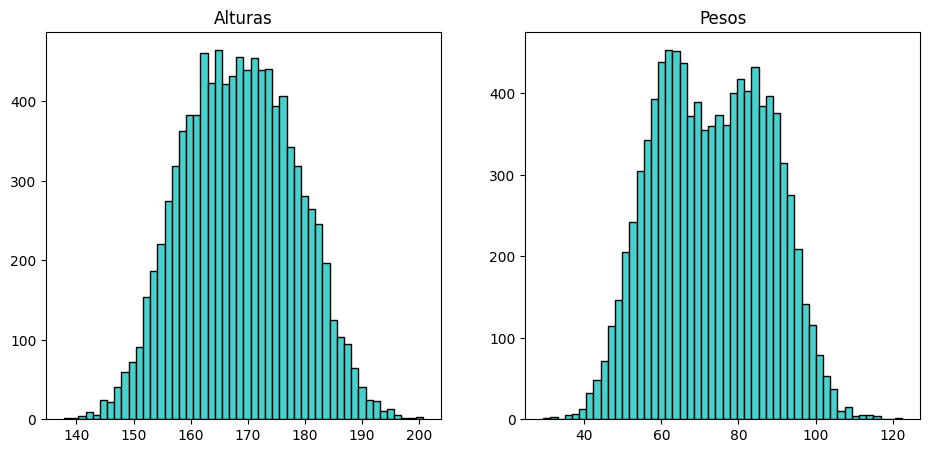

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=3.0)

axs[0].hist(data['Height'], color = 'mediumturquoise', edgecolor = 'black', bins=50)
axs[0].set_title('Alturas')

axs[1].hist(data['Weight'], color = 'mediumturquoise', edgecolor = 'black', bins=50)
axs[1].set_title('Pesos')


### Característica particular de los datos

Dado que la mitad de los datos provienen de hombres y la otra mitad de mujeres, es muy probable que si bien ambas series pertenecen a la misma distribución, sus parámetros son diferentes. Esto puede visualizarse en el histograma del pesos, ya que da la impresión de que se forman dos campanas de Gauss diferentes acopladas.

In [6]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

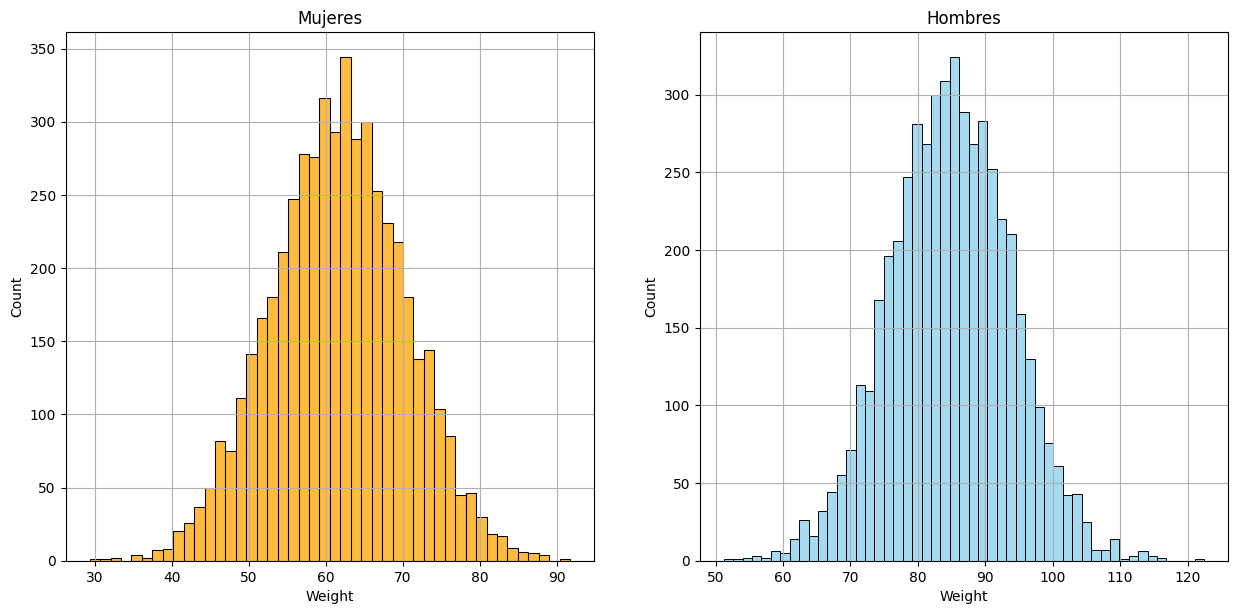

In [7]:
figure, axs = plt.subplots(1,2,figsize=(15,7))

sns.histplot(data.loc[data.Gender == 'Female'].Weight, ax=axs[0], color="orange")

sns.histplot(data.loc[data.Gender == 'Male'].Weight, ax=axs[1], color="skyblue")
axs[0].set_title("Mujeres")
axs[1].set_title("Hombres")
axs[0].grid()
axs[1].grid()
plt.show()


In [8]:
print("Media de los pesos: {}".format(stats.mean(data.Weight)))
print("Media de las alturas: {}".format(stats.mean(data.Height)))

Media de los pesos: 73.2288654780145
Media de las alturas: 168.57360177724595


Podemos observar que nuestros datos pertenecen a un dataset que contiene los pesos y alturas de personas según su género. El peso tiene como unidad de medida las **libras** y la altura las **pulgadas**. El dataset tiene un largo de 10000 datos, de los cuales 5000 pertenecen a pesos y alturas de hombres y los otros 5000 a mujeres. La media muestral de los pesos es de 72.228 kg y la de las alturas es de 168.67 cm.  

### Distribución empírica de los datos

En base a las características observadas de los datos, se infiere que estos pertenezcan a una distribución normal, ya que se observa una simetría en los histogramas. Además se consideran solo los primeros 5000 datos, los cuales perteneces a hombres, debido a que como de dedujo, estos pertenecen a la misma distribución.

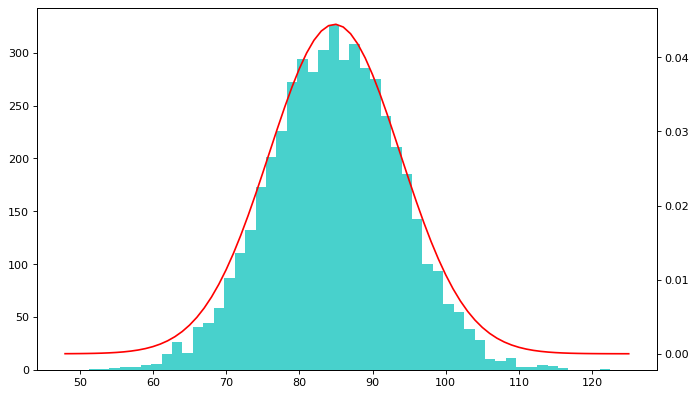

In [9]:
fig, axs = plt.subplots(figsize=(10, 6), dpi=80)

axs.hist(data['Weight'][0:5000], color = 'mediumturquoise', bins=50)

args = scipy.stats.norm.fit(data['Weight'][0:5000])

ax1 = axs.twinx()

xmin, xmax = plt.xlim()
vec = list(range(round(xmin), round(xmax)))

vec_norm = []
for i in vec:
    vec_norm.append(scipy.stats.norm.pdf(x=i, loc=args[0], scale=args[1]))

ax1.plot(vec,vec_norm,color='red')



### 2. Estadísticos Muestrales

In [10]:
data = data["Weight"]

In [11]:
N = random.randint(1, len(data)-1)
print("Valor obtenido de N: ",N)
N = 2690

Valor obtenido de N:  2430


### Media muestral

In [12]:
n1 = N
muestra = data.sample(n=N)
medias = []
medias.append(stats.mean(muestra))
while(N < len(data)):
    N+=1
    muestra = data.sample(n=N)
    medias.append(stats.mean(muestra))

Text(0.5, 1.0, 'Gráfica de la Media')

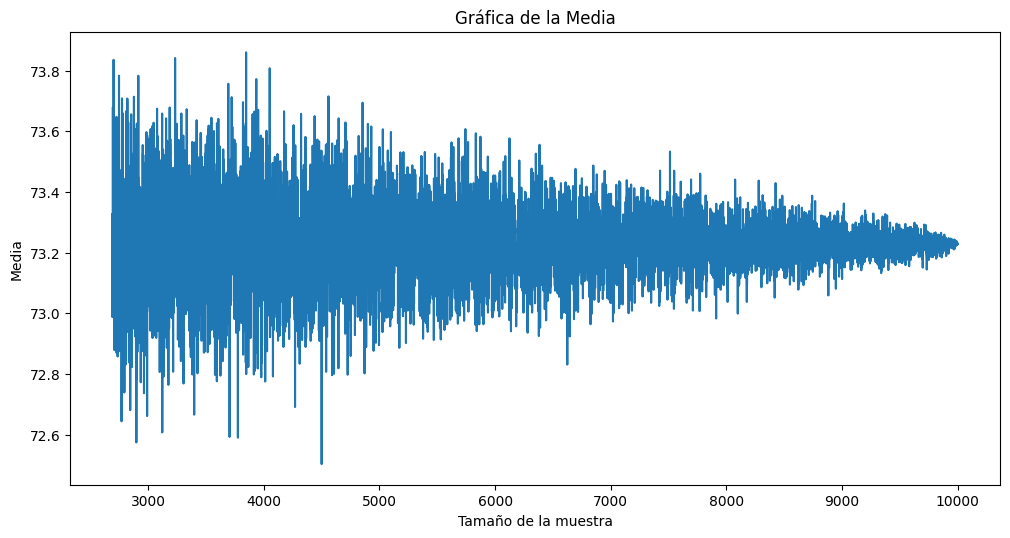

In [13]:
x = np.arange(n1,len(data)+1)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,medias)
ax.set_xlabel("Tamaño de la muestra")
ax.set_ylabel("Media")
ax.set_title("Gráfica de la Media")

### Desviación estandar

In [14]:
n2 = N
muestra = data.sample(n=N)
sdevs = []
sdevs.append(stats.stdev(muestra))
while(N < len(data)):
    N+=1
    muestra = data.sample(n=N)
    sdevs.append(stats.stdev(muestra))

Text(0.5, 1.0, 'Gráfica de la desviación estándar')

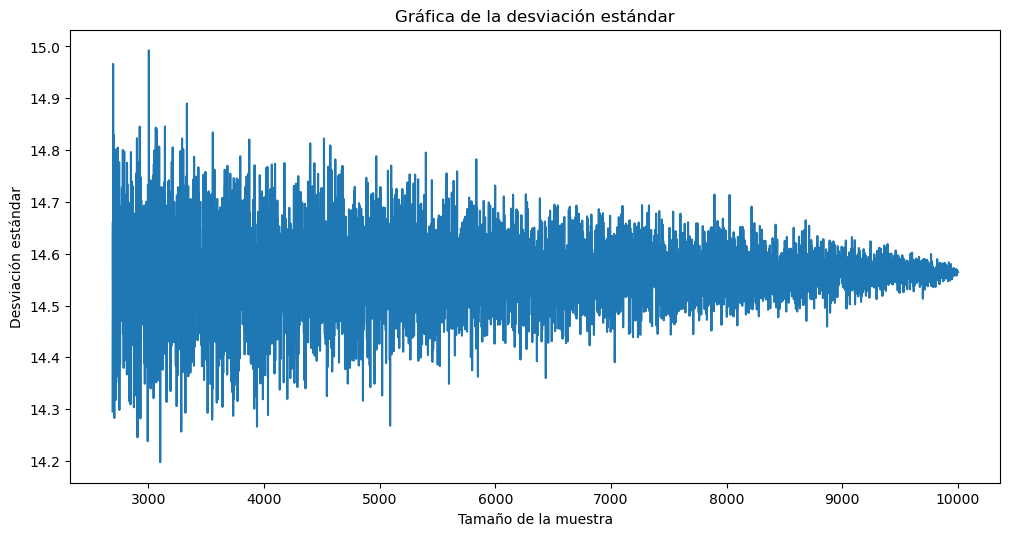

In [8]:
x = np.arange(n2,len(data)+1)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,sdevs)
ax.set_xlabel("Tamaño de la muestra")
ax.set_ylabel("Desviación estándar")
ax.set_title("Gráfica de la desviación estándar")

### Mediana

In [10]:
muestra = data.sample(n=N)
n3 = N
meds = []
meds.append(stats.median(muestra))
while(N < len(data)):
    N+=1
    muestra = data.sample(n=N)
    meds.append(stats.median(muestra))

Text(0.5, 1.0, 'Gráfica de la mediana')

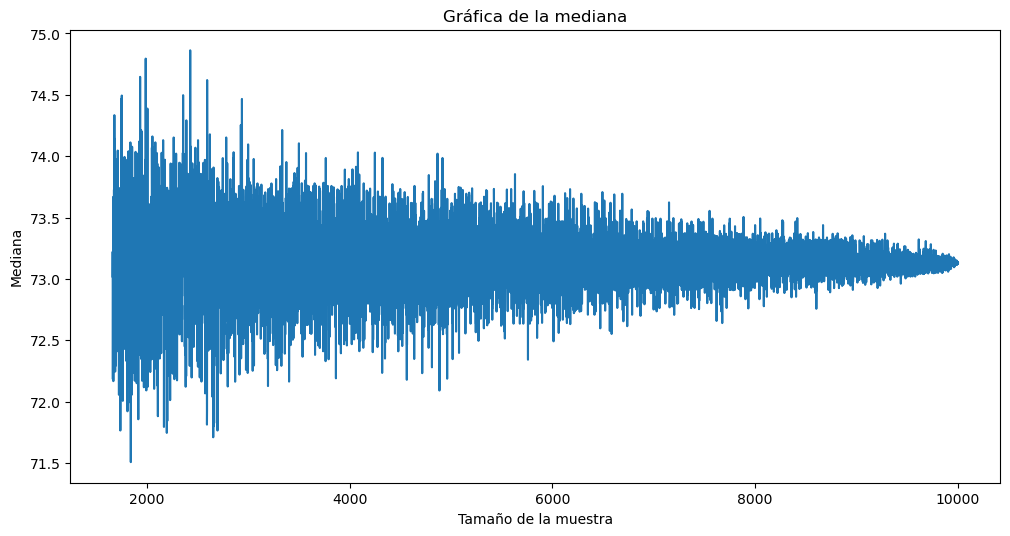

In [11]:
x = np.arange(n3, len(data)+1)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,meds)
ax.set_xlabel("Tamaño de la muestra")
ax.set_ylabel("Mediana")
ax.set_title("Gráfica de la mediana")

### Interpretación de resultados

Se observa que para cada uno de los estadísticos analizados que a medida que el tamaño de la muestra aleatoria aumenta, la medida del estadístico comienza a converger. En base a la Ley de los grandes números, esto es esperable ya que esta nos dice que cuando el tamaño de la muestra tiende a infinito o es muy grande, el valor de sus estadísticos muestrales converge o se aproxima a los valores poblacionales.

### 3.

In [22]:
# Dividimos el dataset en grupos 
groups = 500
data_mens = data[:5000]
shuffled = data_mens.sample(frac=1)
arr_groups = np.array_split(shuffled, groups)  


(array([ 1.,  0.,  5.,  6., 10., 19., 23., 43., 49., 59., 49., 64., 59.,
        49., 30., 14., 12.,  5.,  1.,  2.]),
 array([75.78616022, 76.64271544, 77.49927067, 78.3558259 , 79.21238113,
        80.06893636, 80.92549159, 81.78204681, 82.63860204, 83.49515727,
        84.3517125 , 85.20826773, 86.06482296, 86.92137819, 87.77793341,
        88.63448864, 89.49104387, 90.3475991 , 91.20415433, 92.06070956,
        92.91726478]),
 <BarContainer object of 20 artists>)

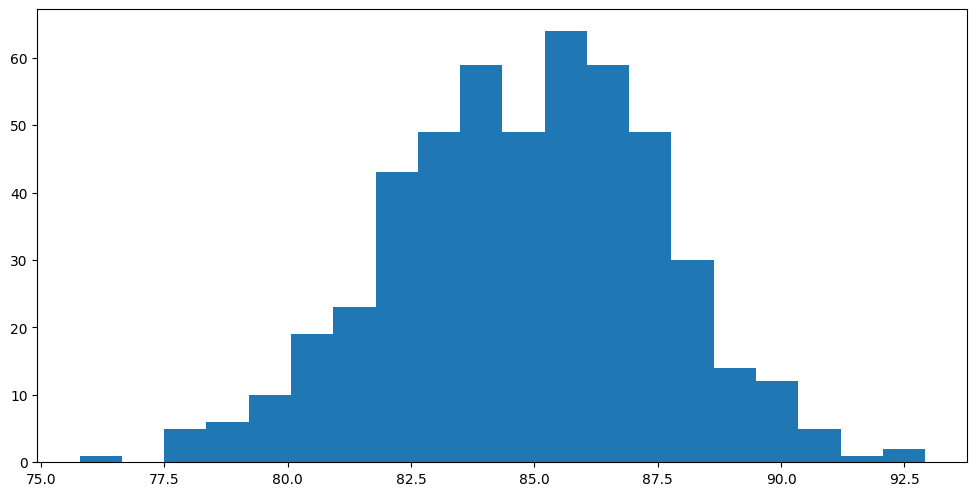

In [23]:
#Estadísticos empírico: media
mean_groups = [stats.mean(group) for group in arr_groups]

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(mean_groups, bins=20)

(array([ 3., 20., 31., 37., 51., 61., 53., 50., 53., 45., 41., 21., 14.,
        11.,  3.,  5.,  0.,  0.,  0.,  1.]),
 array([ 4.26770238,  4.9057223 ,  5.54374222,  6.18176214,  6.81978207,
         7.45780199,  8.09582191,  8.73384183,  9.37186176, 10.00988168,
        10.6479016 , 11.28592152, 11.92394145, 12.56196137, 13.19998129,
        13.83800121, 14.47602113, 15.11404106, 15.75206098, 16.3900809 ,
        17.02810082]),
 <BarContainer object of 20 artists>)

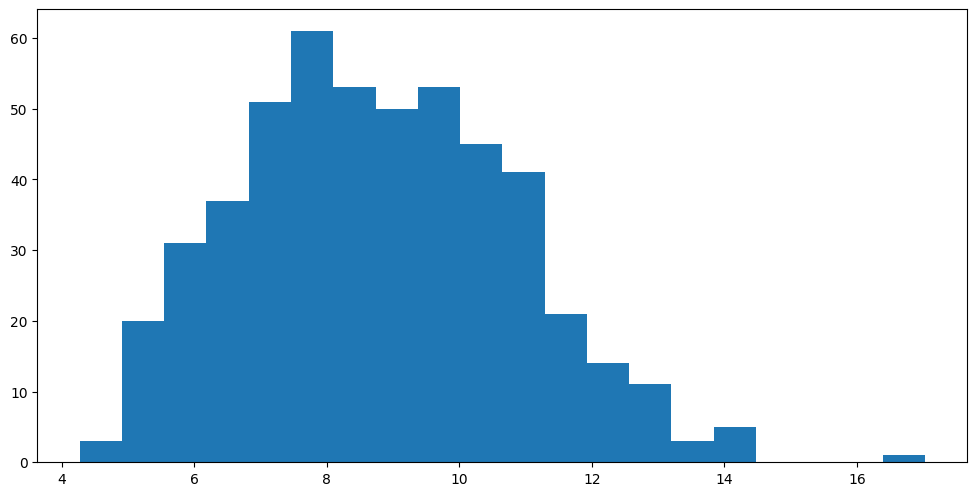

In [24]:
#Estadísticos empírico: desviación estandar
stdev_groups = [stats.stdev(group) for group in arr_groups]
#print(stdev_groups)
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(stdev_groups, bins=20)

(array([ 3.,  3.,  3.,  5.,  7., 26., 29., 36., 50., 61., 49., 63., 58.,
        36., 28., 18., 15.,  6.,  2.,  2.]),
 array([74.8424057 , 75.8013231 , 76.76024051, 77.71915791, 78.67807532,
        79.63699272, 80.59591012, 81.55482753, 82.51374493, 83.47266234,
        84.43157974, 85.39049714, 86.34941455, 87.30833195, 88.26724936,
        89.22616676, 90.18508416, 91.14400157, 92.10291897, 93.06183638,
        94.02075378]),
 <BarContainer object of 20 artists>)

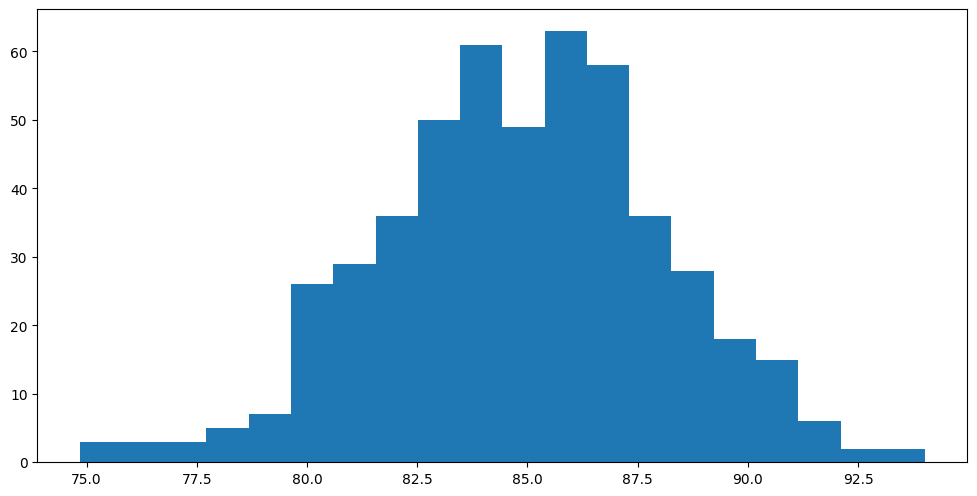

In [25]:
#Estadísticos empírico: 
median_groups = [stats.median(group) for group in arr_groups]

#print(median_groups)

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(median_groups, bins=20)

Según el **teorema del límite central**: *dada una muestra aleatoria suficientemente grande de la población, la distribución de las medias muestrales seguirá una distribución normal.* 
Con su definición respectiva en mente, queremos saber si podemos aplicar los estadísticos muestrales previamente calculados (media, desviación estandar y mediana) de los pesos de hombres de la muestra en una población (solo hombres para este caso).
- Podemos concluir que, al dividir nuestra muestra de 10,000 datos en 500 subgrupos del mismo tamaño, obtenemos una distribución bastante cercana a la normal, por lo que se puede decir que con esta muestra podemos simular la media de los pesos de la población en el lugar en el que se recolectaron los datos, obteniendo un resultado fidedigno a la realidad.  

### 4

Para formular la hipótesis se consideran solo los datos pertenecientes a hombres, ya que se infiere que si bien ambos géneros siguen la misma distribución, los parámetros de esta son diferentes.

Sea:
- $h_0$: Los datos siguen una distribución normal
- $h_1$: Los datos siguen otra distribución

In [68]:
# Se importan los datos del peso de los hombres
data = pd.read_csv("weight-height.csv")["Weight"][0:5000]

Luego, se calculan los parámetros MV para una distribución normal

In [65]:
args = scipy.stats.norm.fit(data[0:5000])

In [70]:
scipy.stats.kstest(data[0:5000],'norm', args=args)

KstestResult(statistic=0.006537082510595149, pvalue=0.9822366946029334)

Al aplicar el test KS con los parámetros MV se obtuvo p-value igual a 0.98, el cual es mayor a la significancia 0.05, lo que significa que no se tiene suficiente información para rechazar la hipótesis nula.

In [73]:
# Se genera una seria de datos aleatoria con distribución normal con los parámetros MV calculados previamente
datos_norm2 = scipy.stats.norm.rvs(loc=args[0],scale=args[1] , size=5000)
scipy.stats.kstest(data[0:5000], datos_norm2)

KstestResult(statistic=0.0124, pvalue=0.8367973787613723)

Luego de generar la nueva serie de datos y aplicar el test KS, se obtuvo un p-value igual a 0.836. En base a este valor se puede deducir que ambas series de datos pertenecen a la misma distribución con un 95% de confianza.

De forma general, al interpretar los resultados de los dos tests KS realizados no se tiene evidencia suficiente para rechazar $h_0$. Por lo que puede inferirse que los datos del peso pertenecientes a hombres siguen una distribución normal con un 95% de confianza.

### 5

### Estimación incerteza para la media muestral

In [15]:
b = 2700
mean = stats.mean(data)
n = len(data)

mean_list =[]
for i in range(b):
    dat = np.random.choice(list(data),size=n,replace=True)
    mean_list.append(stats.mean(dat))
    
var = stats.variance(mean_list)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (mean, rango )))

0.021275972965657985


<IPython.core.display.Math object>

En base a las estimaciones realizadas utilizando boostrap se pudo obtener la incerteza de la media, donde puede deducirse que el valor de este estadístico se encuentre en el rango 73.23 $\pm$ 0.29 con un 95% de confianza.

### Estimación incerteza para desviación estándar

In [16]:
b = 2700
stdev = np.std(data)
n = len(data)

sdev_list =[]
for i in range(b):
    dat = np.random.choice(list(data),size=n,replace=True)
    sdev_list.append(np.std(dat))
    
var = stats.variance(sdev_list)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (stdev, rango )))

0.006454534401434455


<IPython.core.display.Math object>

En el caso de la desviación estándar de los datos, luego de usar bootstrap se obtuvo el nivel de incerteza de este estadístico. Este resultado puede interpretarse como que hay un 95% de confianza que la desviación estándar se encuentre en el rango 14.56 $\pm$ 0.16.

### Estimación incerteza para mediana

In [17]:
b = 2700
median = stats.median(data)
n = len(data)

median_list =[]
for i in range(b):
    dat = np.random.choice(list(data),size=n,replace=True)
    median_list.append(stats.median(dat))
    
var = stats.variance(median_list)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (median, rango )))

0.07067073044648646


<IPython.core.display.Math object>

Por último, se realizó la misma estimación de incerteza para la mediana, de la cual se concluye que dicho estadístico se va a encontrar en el rango 73.13 $\pm$ 0.52 con un 95% de confianza. 

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
